# Taller 


### Resolver los siguientes problemas, por el metodo de la biseccion, newton, punto fijo y secante, realizar una comparación del error como función del las numero de iteraciones


1. Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$


![Plano Inclinado](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig0.png)


2. Determinar el ángulo del sector circular que es igual a un cuarto del área de la circunferencia 


3. Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)


Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden







4. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

In [ ]:
#Se importan las librerias

import math
import numpy as np
import tqdm as tqdm
import pandas as pd
from scipy import optimize
import matplotlib.pylab as plt
from PIL import Image

# Solución Primer punto


In [ ]:
w1= np.linspace(-2*np.pi,0,100)
def fun(w):
    return  (-9.76/ 2*(w**2))*np.sinh(w)-np.sin(w)-0.51

**Método de Bisección**


la raiz de f(theta) -0.33283233642578125


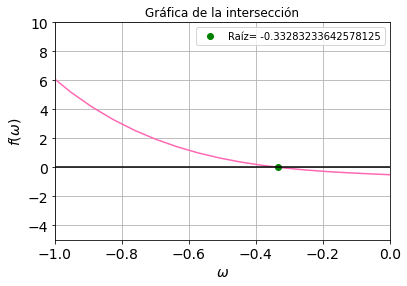

In [ ]:
root = optimize.bisect(fun, 1, -3, xtol=1E-5)
print( f"la raiz de f(theta) {root:}")

plt.plot(w1, fun(w1),"hotpink")
plt.title("Gráfica de la intersección")
plt.xlim(-1,0)
plt.ylim(-5,10)
plt.xlabel("$\\omega$", fontsize=14 )
plt.ylabel( "$f(\\omega)$",fontsize=14 )
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.plot(root,fun(root),'go', label=f'Raíz= {root}')
plt.axhline(0, color = 'black')
plt.legend()
plt.grid()

Método de Punto Fijo

In [ ]:
g= lambda w: w- fun(w)
rootp1= optimize.fixed_point(g, -0.2)
print("La raiz es:",rootp1)

La raiz es: -0.3328366665346876


Metodo de Newton y Método Secante

In [ ]:

def df(x): 
    return -(4.88*(x*np.cosh(x))- 2*np.sinh(x)/(x**3- np.cos(x)))

Raiz= optimize.newton(fun,w1, tol = 1e-5)
print("La raiz usando el metodo de secante es:", Raiz[0])

raiz1 = optimize.newton(fun,root,fprime=df,tol=1.e-5)       
print("La raiz usando el metodo de newton es:", raiz1)


La raiz usando el metodo de secante es: -0.33283666653803906
La raiz usando el metodo de newton es: -0.332827625163355


# Solución Segundo Punto

In [ ]:
f = lambda theta: theta - np.sin(theta) - np.pi/2
theta = np.linspace(0, 2*np.pi, 100)

df = pd.DataFrame({ "theta": theta, "f_theta": f(theta)  })


**Método de Bisección**

In [ ]:
rootp2 = optimize.bisect(f, 1, 3, xtol=1E-6)
print( f"la raiz de usando Bisección f(theta) {rootp2:}")

la raiz de usando Bisección f(theta) 2.309882164001465


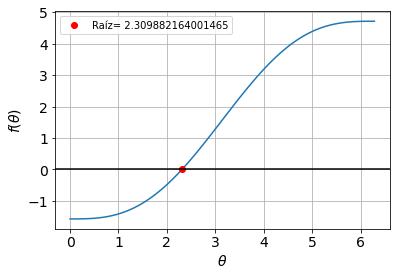

In [ ]:
plt.figure()
plt.plot(df.theta.values, df.f_theta.values)
plt.xlabel("$\\theta$", fontsize=14 )
plt.ylabel( "$f(\\theta)$",fontsize=14 )
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.plot(rootp2,f(rootp2),'ro', label= f'Raíz= {rootp2}')
plt.axhline(0, color = 'black')
plt.legend()
plt.grid()
plt.show()

**Método Punto Fijo**

In [ ]:
g1 = lambda theta: theta - f(theta)
root1= optimize.fixed_point(g1, -0.2)
print(f"La raiz usando Punto fijo es:",root1)

La raiz usando Punto fijo es: 2.3098814600100575


**Método Secanta y Método de Newton**

In [ ]:
def dfu(theta): 
    return (1-np.cos(theta))

Root2= optimize.newton(f,theta, tol = 1e-5)
print("La raiz usando el metodo de secante es:", Root2[1])

raiz1 = optimize.newton(f,root1 ,fprime=dfu,tol=1e-5)       
print("La raiz usando el metodo de newton es:", raiz1)

La raiz usando el metodo de secante es: 2.3098814600100575
La raiz usando el metodo de newton es: 2.309881460010057


/usr/local/lib/python3.7/dist-packages/scipy/optimize/zeros.py:450: RuntimeWarning: RMS of 3.41425e-06 reached
  'RMS of {:g} reached'.format(rms), RuntimeWarning)


# Solución Tercer Punto

In [ ]:
l = 89
h = 49
D = 55
β = 0.064*np.pi 
A = l * np.sin(β)
B = l * np.cos(β)
C = (h + 0.5 * D) * np.sin(β) - 0.5 *D*np.tan(β)
E = (h + 0.5 * D) * np.cos(β) - 0.5 * D

Fun3 = lambda α : A*np.sin(α)*np.cos(α) + B*np.sin(α)**2 - C*np.cos(α) - E*np.sin(α)

Método de Bisección

In [ ]:
fun3 = lambda α : A*np.sin(α)*np.cos(α) + B*np.sin(α)**2 - C*np.cos(α) - E*np.sin(α)

rootp3_1= optimize.bisect(fun3,0,2, xtol=1E-5)
rootp3_2= optimize.bisect(fun3, 2, 2.7, xtol=1E-5)
rootp3_3= optimize.bisect(fun3, 2.6, 3, xtol=1E-5)
rootp3_4= optimize.bisect(fun3, 6, 6.5, xtol=1E-5)

print("La Primera raiz por bisección es:",rootp3_1,". En grados es:", np.rad2deg(rootp3_1),"°")
print("La Segunda raiz por bisección es:",rootp3_2)
print("La Tercera raiz por bisección es:",rootp3_3)
print("La Cuarta raiz por bisección es:",rootp3_4)

La Primera raiz por bisección es: 0.5754470825195312 . En grados es: 32.97068916148555 °
La Segunda raiz por bisección es: 2.5661491394042972
La Tercera raiz por bisección es: 2.940533447265625
La Cuarta raiz por bisección es: 6.082130432128906


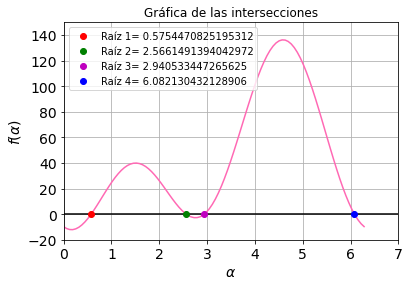

In [ ]:
#Grafica de las raices por el metodo de Bisección
α= np.linspace(0,2*np.pi,100)
plt.plot(α, fun3(α),"hotpink")
plt.title("Gráfica de las intersecciones")
plt.xlim(0,7)
plt.ylim(-20,150)
plt.xlabel("$\\alpha$", fontsize=14 )
plt.ylabel( "$f(\\alpha)$",fontsize=14 )
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.axhline(0, color = 'black')
plt.plot(rootp3_1,fun3(rootp3_1),'ro', label= f'Raíz 1= {rootp3_1}')
plt.plot(rootp3_2,fun3(rootp3_2),'go', label= f'Raíz 2= {rootp3_2}')
plt.plot(rootp3_3,fun3(rootp3_3),'mo', label= f'Raíz 3= {rootp3_3}')
plt.plot(rootp3_4,fun3(rootp3_4),'bo', label= f'Raíz 4= {rootp3_4}')
plt.legend()
plt.grid()

Método Punto Fijo

In [ ]:
gp3 = lambda α: α - fun3(α)
root1= optimize.fixed_point(gp3,0.57)
root2= optimize.fixed_point(gp3,2.56)
print("La raiz usando Punto fijo es:",root1, ". En grados es:", np.rad2deg(root1), "°")

La raiz usando Punto fijo es: 0.5754462949815505 . En grados es: 32.97064403888305 °


Método Secante y Método de Newton

In [ ]:
def dfu3(α): 
    return (A*np.cos(2*α) + B+np.sin(2*α) - C*np.sin(α) - E*np.cos(α))

Root2= optimize.newton(fun3, α , tol = 1e-5)
print("La raiz usando el método de secante es:", Root2[3], ". En grados es:", np.rad2deg(Root2[3]),"°")

raiz1 = optimize.newton(fun3,rootp3_1 ,fprime=dfu3,tol=1e-5)       
print("La raiz usando el método de newton es:", raiz1, ". En grados es:", np.rad2deg(raiz1),"°" )

La raiz usando el método de secante es: 0.5754462949815512 . En grados es: 32.97064403888309 °
La raiz usando el método de newton es: 0.5754462630454462 . En grados es: 32.97064220907906 °


## **Por lo tanto, el resultado se aproxima a 33° por lo que se comprueba el enuncido**

# Solución Cuarto punto 

In [ ]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin


In [ ]:
#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  


In [ ]:
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


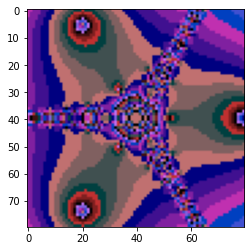

In [ ]:
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)


# La tarea se realizó en pareja entre las estudiantes Anny Diossa Castañeda y Sara Carvajal Ramírez